In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_registered = pd.read_csv('registrado.csv')
df_registered.set_index('Registrado (mil ton.)', inplace=True)
df_registered = df_registered.T
df_registered

Registrado (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiais,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,11.188,32.388,9.691,42.731,291.428,151.601,48.990,111.377,178.918,70.660,...,57.142,226.547,232.609,46.081,32.559,9.908,252.700,860.232,36.567,31.615
2019-02,10.381,30.378,7.378,36.026,249.430,129.537,44.726,98.614,161.936,50.796,...,46.283,228.500,195.364,38.703,24.910,10.723,246.146,773.607,30.849,30.275
2019-03,8.080,30.641,6.970,34.609,241.612,105.236,44.491,94.022,173.792,47.834,...,43.390,223.896,205.690,36.037,28.713,10.625,255.873,790.146,31.021,29.568
2019-04,11.154,32.337,7.612,40.787,252.303,110.835,43.901,91.546,176.627,45.327,...,40.824,234.132,231.354,38.430,32.660,10.593,273.299,886.929,31.437,26.940
2019-05,12.508,36.405,8.442,39.823,281.912,127.925,55.019,95.674,207.991,54.032,...,55.063,207.586,236.711,44.471,31.635,10.681,270.918,941.600,31.533,35.910
2019-06,12.126,22.499,8.835,39.957,200.213,127.138,50.942,88.927,185.784,60.657,...,56.474,228.583,215.360,37.884,35.142,7.887,256.605,817.301,26.431,33.954
2019-07,14.496,27.961,11.251,52.048,270.511,157.128,63.992,105.688,234.176,67.250,...,68.133,234.565,258.015,51.585,36.419,9.751,303.526,957.289,25.978,37.983
2019-08,16.723,32.378,11.342,53.567,281.466,164.440,64.127,104.711,226.996,70.773,...,68.642,249.519,244.870,54.306,40.300,9.654,299.284,978.990,29.860,40.046
2019-09,15.253,32.582,13.110,46.239,285.535,140.298,60.822,97.530,218.141,67.010,...,64.741,230.086,225.410,52.511,35.493,9.422,284.550,906.956,39.045,32.647
2019-10,16.531,42.703,13.195,51.066,328.259,168.407,65.182,99.651,234.939,81.128,...,71.269,233.136,252.849,59.472,38.489,11.160,307.576,980.948,45.213,39.065


In [3]:
df_previsto = pd.read_csv('previsto.csv')
df_previsto.set_index('Previsto (mil ton.)', inplace=True)
df_previsto = df_previsto.T
df_previsto

Previsto (mil ton.),Acre,Alagoas,Amapá,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goiais,Maranhão,...,Piauí,Rio Grande do Sul,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins
2019-01,11.401414,28.908197,10.166004,38.597969,243.579025,134.753708,44.011467,92.793297,167.311462,53.138344,...,59.893147,218.017136,185.437149,41.330322,33.004307,8.070765,225.465286,825.252136,31.257040,32.619011
2019-02,10.109691,28.321617,8.510157,36.355202,237.531769,118.832764,45.079945,91.585213,168.372238,49.074421,...,52.611877,219.146271,179.795563,41.116554,29.690796,8.141126,230.189529,859.542297,31.213751,32.722519
2019-03,9.572351,29.435404,8.682337,38.529034,241.214386,120.640297,44.857445,93.062317,171.711517,54.193989,...,50.508827,221.244629,183.436218,40.775570,28.400497,8.201465,237.645966,872.964539,30.480408,34.411827
2019-04,10.387037,26.819201,8.160279,36.594177,244.537872,119.415054,46.764717,94.138054,180.247360,58.948261,...,51.280560,220.479446,191.179703,40.544323,29.049093,8.283481,242.303375,874.256226,30.225586,36.373085
2019-05,12.736471,25.591978,8.537778,38.114784,250.706711,122.956345,51.159706,97.723434,195.982635,65.199188,...,55.658886,222.191696,208.280807,40.325996,31.927078,8.373121,251.697342,921.265320,30.397379,39.274788
2019-06,14.381495,26.310465,9.684858,40.310677,265.816772,137.736908,55.709064,101.410271,207.056564,69.983818,...,58.643482,223.654053,216.927200,40.651680,35.803078,8.476167,261.815735,921.999512,31.063059,42.082672
2019-07,15.323538,26.332926,11.196179,40.883690,258.860138,167.478394,60.958515,106.055870,212.637299,74.102501,...,63.403492,224.611771,217.644608,42.205811,39.311901,8.548434,268.855865,975.165161,31.572887,44.418545
2019-08,16.531315,30.957781,11.973860,41.912392,281.947937,177.947235,66.204666,108.176125,218.529221,80.678452,...,66.531052,226.030426,219.660156,48.176823,41.114582,8.680769,278.875671,946.195801,32.874939,45.882191
2019-09,16.587305,33.437225,12.789886,42.824581,284.043152,172.668976,68.216110,108.765060,220.001221,85.296066,...,69.200333,225.043869,222.479950,52.086113,40.678600,8.819237,284.043610,932.906067,33.892776,46.051750
2019-10,15.956187,34.388222,13.253313,43.167854,288.668884,181.975449,69.337753,108.532982,219.122528,86.067390,...,69.822563,222.858795,219.568237,51.696716,40.612373,8.905887,281.036377,927.967407,34.450577,44.908199


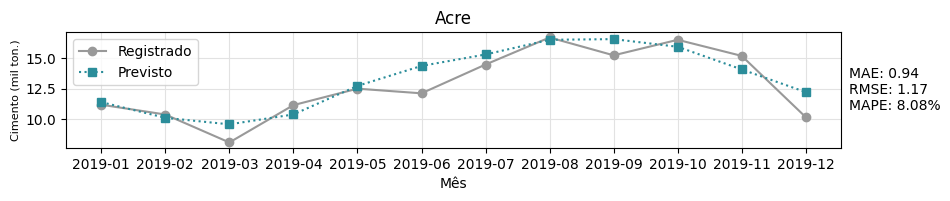

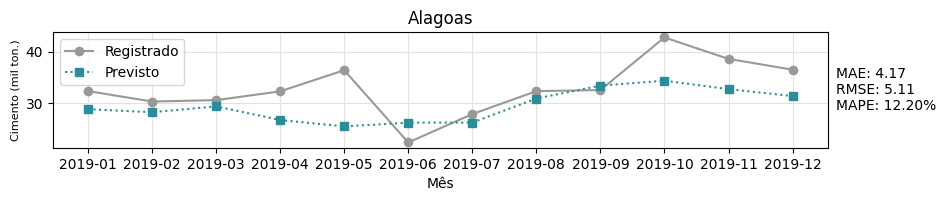

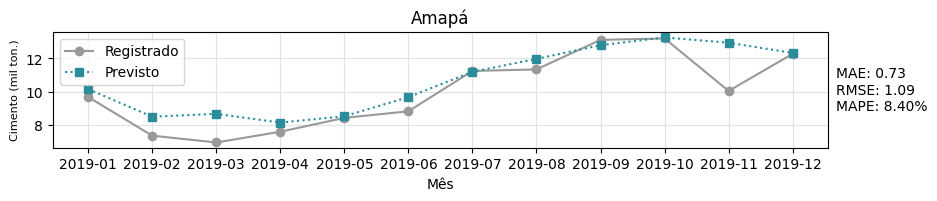

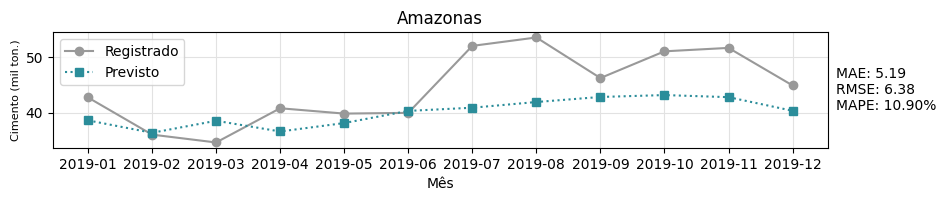

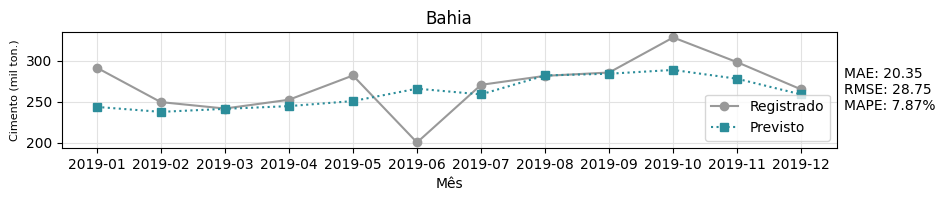

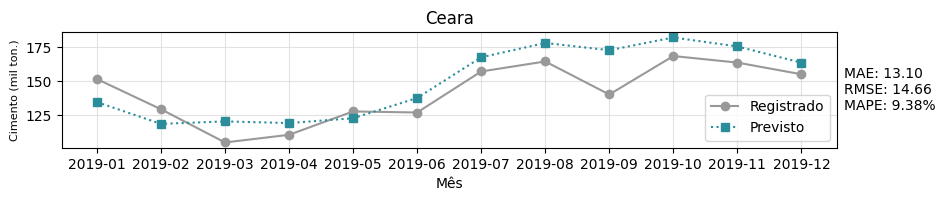

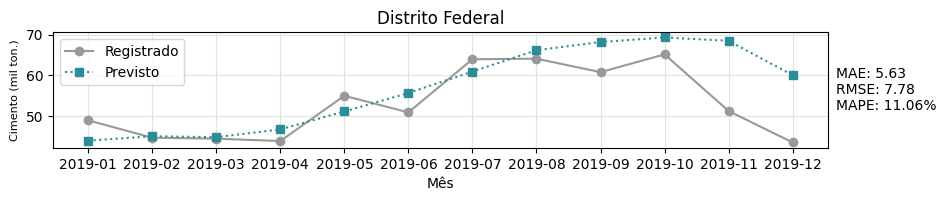

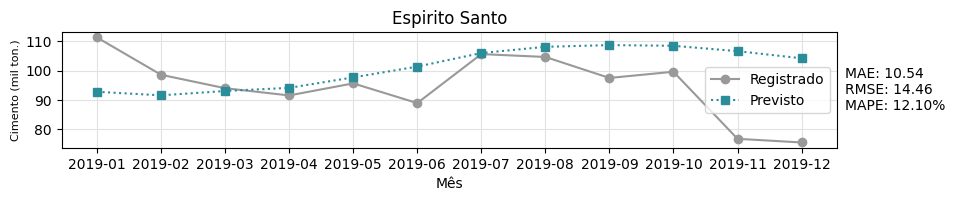

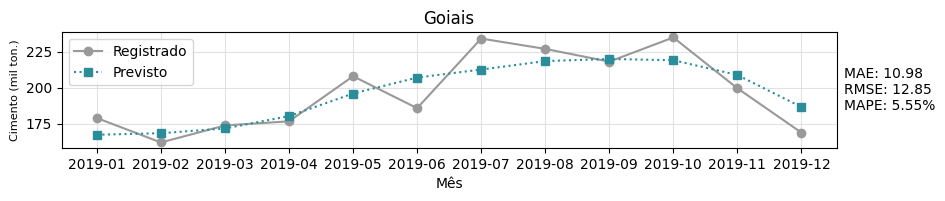

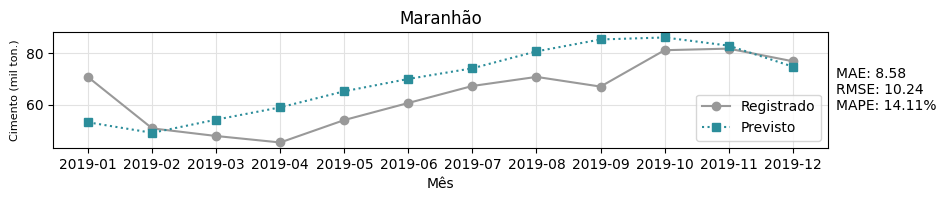

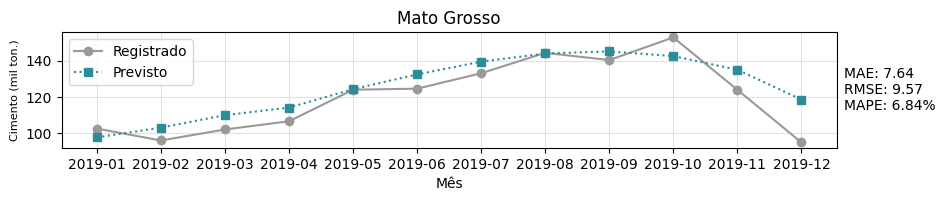

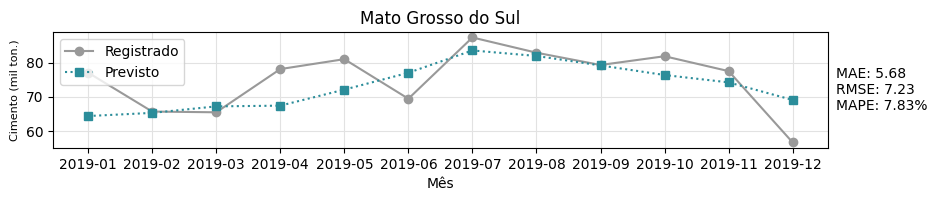

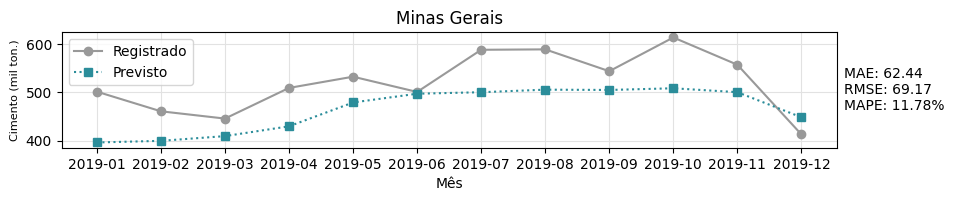

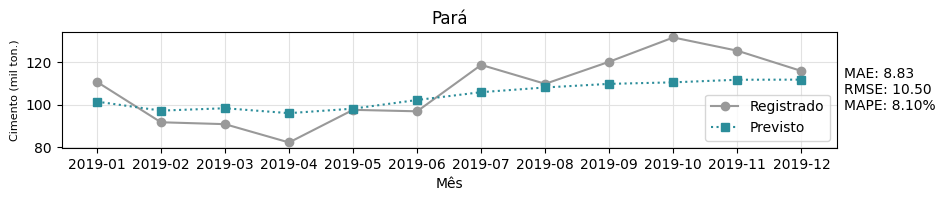

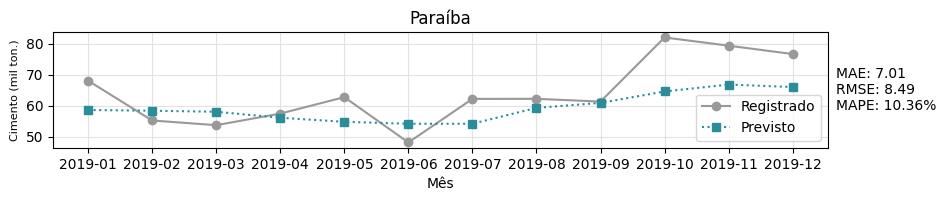

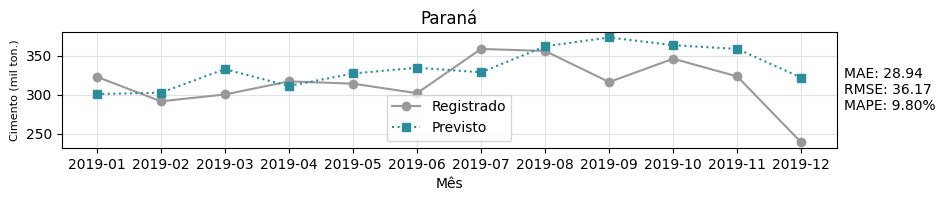

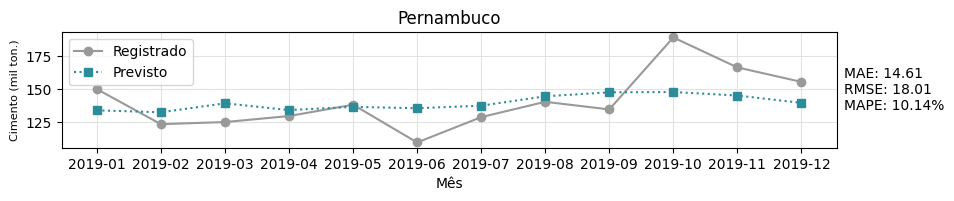

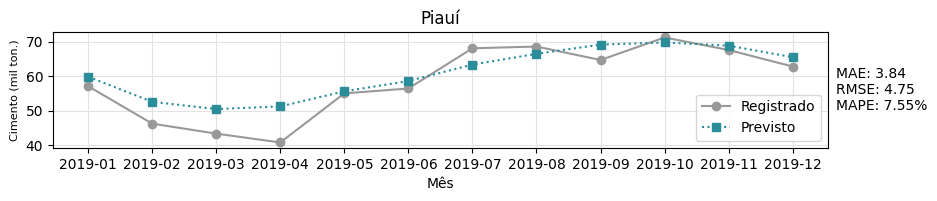

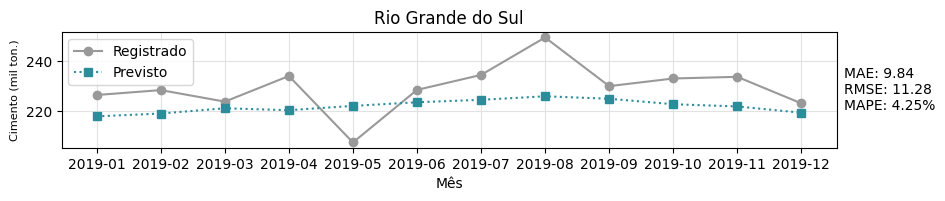

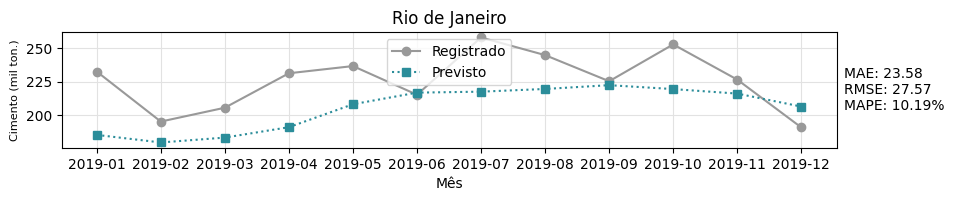

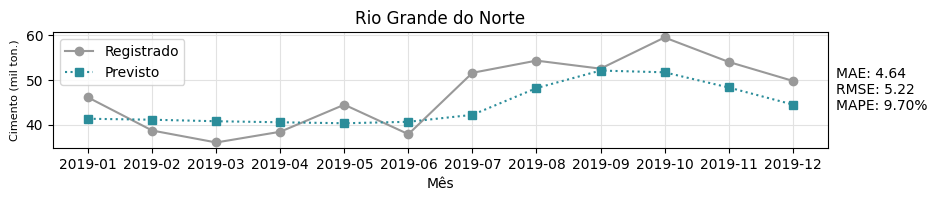

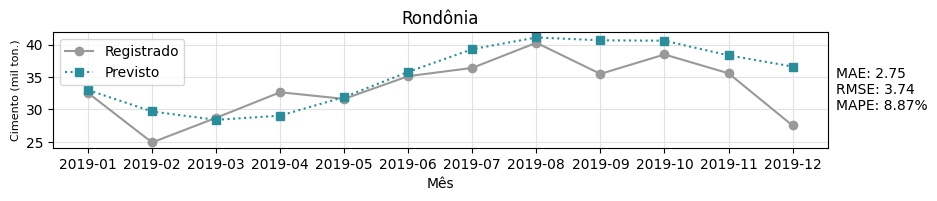

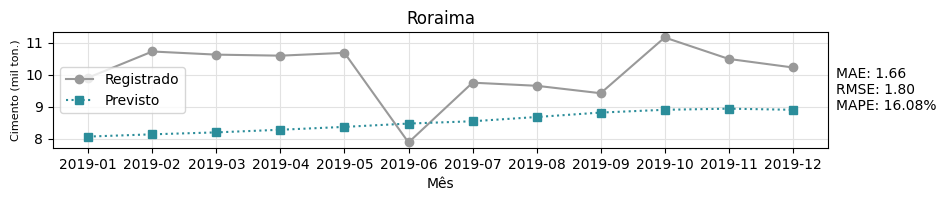

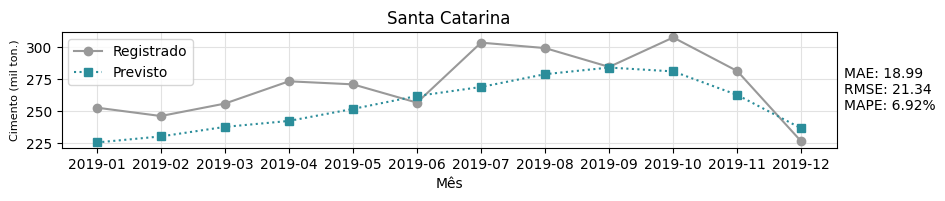

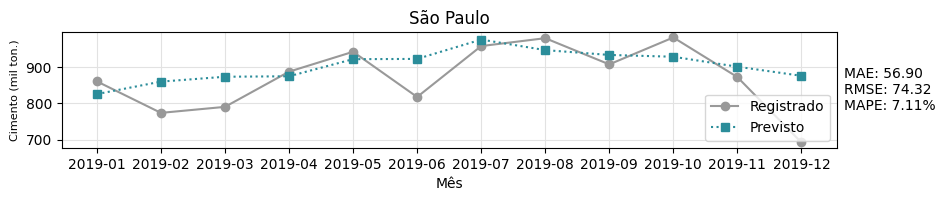

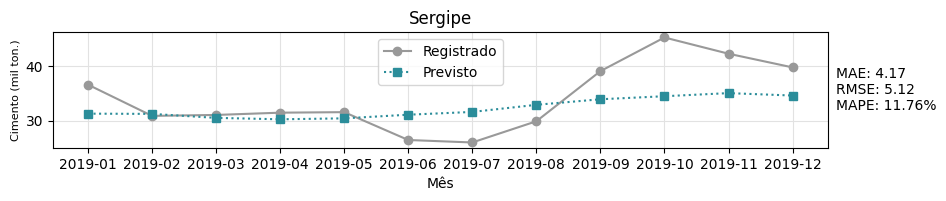

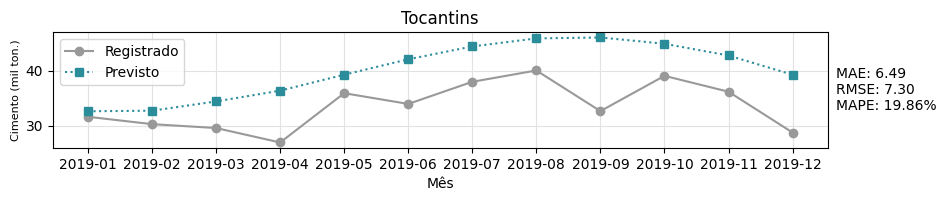

In [4]:
def plot_time_series(df_registered, df_previsto):
    states = df_registered.columns  

    for state in states:
        plt.figure(figsize=(10, 1.5))
        plt.plot(df_registered.index, df_registered[state], 
                 label='Registrado', marker='o', color='#999999') 
        plt.plot(df_previsto.index, df_previsto[state], 
                 label='Previsto', marker='s', linestyle='dotted', color='#2b8d9a') 

        actual = df_registered[state]
        predicted = df_previsto[state]

        mae = mean_absolute_error(actual, predicted)
        rmse = mean_squared_error(actual, predicted, squared=False)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        info_text = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%' 

        plt.text(1.01, 0.5, info_text, transform=plt.gca().transAxes, 
                 fontsize=10, verticalalignment='center')

        plt.xlabel('Mês', fontsize=10)  
        plt.ylabel('Cimento (mil ton.)', fontsize=8) 
        plt.title(f'{state}')
        plt.legend()
        plt.grid(True, color='#E2E2E2') 
        plt.show()


plot_time_series(df_registered, df_previsto)

In [5]:
def plot_error_distribution(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    all_errors = errors.values.flatten()
    ranges = [float('-inf'), -50, -30, -10, 10, 30, 50, float('inf')]
    error_counts = pd.cut(all_errors, ranges).value_counts().sort_index()
    labels = ['< -50%', '-50% to -30%', '-30% to -10%', '-10% to 10%', '10% to 30%', '30% to 50%', '> 50%']

    plt.figure(figsize=(8, 6))
    bars = plt.barh(labels, error_counts, color='#2b8d9a')
    plt.xlabel('Número de previsões')
    plt.ylabel('Intervalo de erros')
    plt.title('Distribuição agregada de erros')
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{(count / sum(error_counts)) * 100:.1f}%", 
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

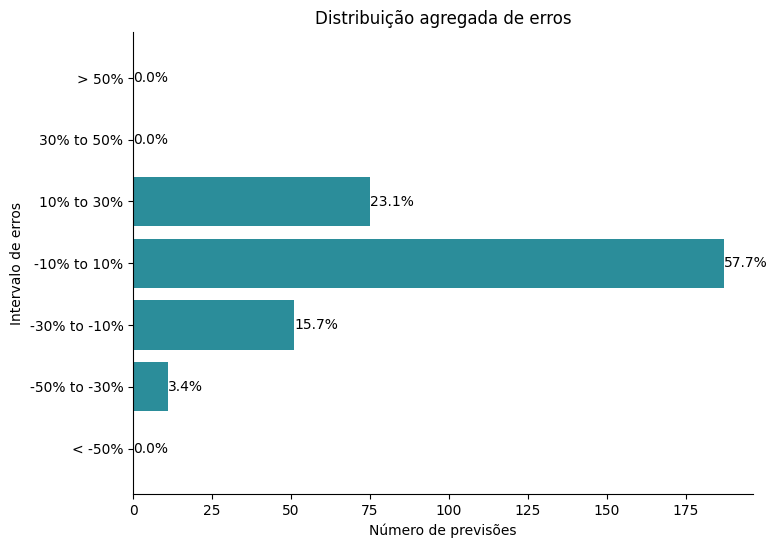

In [6]:
plot_error_distribution(df_registered, df_previsto)

In [7]:
def calculate_errors_summary(df_registered, df_previsto):
    errors = ((df_registered - df_previsto) / df_registered) * 100
    
    rmse_values = []
    mae_values = []
    mape_values = []

    for column in df_registered.columns:
        actual = df_registered[column]
        predicted = df_previsto[column]

        rmse = mean_squared_error(actual, predicted, squared=False)
        mae = mean_absolute_error(actual, predicted)
        mape = (100 / len(actual)) * sum(abs((actual - predicted) / actual))

        rmse_values.append(round(rmse,2))
        mae_values.append(round(mae,2))
        mape_values.append(round(mape,2))

    summary = {
        'RMSE': rmse_values,
        'MAE': mae_values,
        'MAPE': mape_values
    }

    summary_df = pd.DataFrame(summary, index=df_registered.columns)
    mean_row = {
        'RMSE': round(sum(rmse_values) / len(rmse_values), 2),
        'MAE': round(sum(mae_values) / len(mae_values), 2),
        'MAPE': round(sum(mape_values) / len(mape_values), 2)
    }
    summary_df.loc['Mean'] = mean_row  

    return summary_df

In [8]:
sumario_erro = calculate_errors_summary(df_registered, df_previsto)
sumario_erro

,RMSE,MAE,MAPE
Registrado (mil ton.),,,
Acre,1.17,0.94,8.08
Alagoas,5.11,4.17,12.20
Amapá,1.09,0.73,8.40
Amazonas,6.38,5.19,10.90
Bahia,28.75,20.35,7.87
Ceara,14.66,13.10,9.38
Distrito Federal,7.78,5.63,11.06
Espirito Santo,14.46,10.54,12.10
Goiais,12.85,10.98,5.55
